# 一维稳定流演示

## 承压水

**数学模型**

假设含水层均质各项同性

$$
\left\{
    \begin{array}{l}
    T \frac{\mathrm{d}^2 h}{\mathrm{d}x^2} + W = 0 \\
    h|_{x=0} = h_0 \\
    h|_{x=L} = h_L
    \end{array}
\right.
$$

通解为

$$
h = -\frac{W}{2T} x^2 + Ax + B
$$

由边界条件，有

$$
A = \frac{h_L - h_0}{L} + \frac{W}{2T} L,\quad B = h_0
$$

解为 

$$
h_x = -\frac{W}{2T} \left(x^2 - Lx\right) + \frac{h_L - h_0}{L} x + h_0
$$

- $W = 0$ 为直线

$$
h_x = \frac{h_L - h_0}{L} x + h_0
$$

记

$$
a = \frac{L}{2} + \frac{h_L - h_0}{L} \frac{T}{W}
$$

有

$$
h_x = -\frac{W}{2T} (x - a)^2 + \frac{W}{2T} a^2 + h_0
$$

- $W>0$ 为开口向下的抛物线
- $W<0$ 为开口向上的抛物线

>
> **$a$ 是什么？**
>

**单宽流量**

$$
q_x = -T \frac{\mathrm{d}h}{\mathrm{d}x} = W \left(x - \frac{L}{2}\right) - T \frac{(h_L - h_0)}{L}
$$

**库文件导入与设置**

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import mpl_interactions.ipyplot as iplt

**设置一些初始参数**

In [3]:
# Define aquifer parameters
L = 1000    # Aquifer length, meters
K = 10      # Hydraulic conductivity, meters per day
H = 40      # High water level, meters
zt = 20     # Water level top, meters
zb = 0      # Aquifer bottom, meters
Wh = 0.004  # 1460 mm/a (year)
M = zt - zb
T = K * M

**定义计算水头的子程序, 计算并画出 h_max 位置**

In [5]:
# Define the hydraulic head function
def head(x, h0, hL, W):
    global T, L, zt, H, ax

    h = -W * (x - L) * x / (2 * T) + (hL - h0) * x / L + h0

    # Clear the previous plot
    for i in plt.get_fignums():
        plt.gca()
        ax.cla()

    # Set axis limits
    ax.set_xlim(0, L)
    ax.set_ylim(zb, H)

    ax.plot(x, h, lw=1, label="Hydraulic Head (m)")

    # Plot the divide line if W is not zero
    if not (W == 0):
        a = L / 2 + (hL - h0) * T / (L * W)

        if 0 < a < 1000:
            hmax = -W * (a - L) * a / (2 * T) + (hL - h0) * a / L + h0
            ax.plot(a, hmax, marker="v")
            ax.plot([a, a], [0, hmax])

    # Add legend with custom font properties
    plt.legend(
        prop={"family": "KaiTi"},
        handlelength=2,
        loc=2,
        title="Legend",
        title_fontproperties={"family": "Microsoft YaHei"},
    )
    return h

**用 `mpl_interactions.ipyplot` 交互绘图**

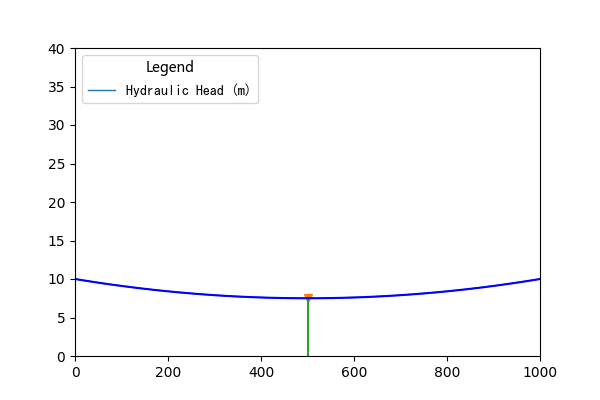

In [6]:
# Define parameter ranges
h0_ = np.linspace(10, 30, 101)
hL_ = np.linspace(10, 30, 101)
w0 = np.linspace(-1, 1, 17)
W_ = w0 * Wh

x = np.linspace(0, L, 101)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=[6, 4])

# Create an interactive plot using iplt.plot with adjustable parameters
controls = iplt.plot(
    x, head, h0=h0_, hL=hL_, W=W_,
    slider_formats={"W": "{:.4f}"}, color="blue")

## 潜水

**数学模型**

假设含水层均质各项同性

$$
\left\{
    \begin{array}{l}
    K \frac{\mathrm{d}}{\mathrm{d}x} \left(h \frac{\mathrm{d}h}{\mathrm{d} x}\right) + W = 0 \\
    h|_{x = 0} = h_0 \\
    h|_{x = L} = h_L
    \end{array}
\right.
$$

采用第二种线性化方法，方程为

$$
\frac{K}{2} \frac{\mathrm{d}^2h^2}{\mathrm{d}x^2} + W = 0
$$

通解为

$$
h^2 = -\frac{W}{K} x^2 + Ax + B
$$

由边界条件，有

$$
A = \frac{h_L^2 - h_0^2}{L} + \frac{W}{K} L,\quad B = h_0^2
$$

解为 

$$
h_x^2 = -\frac{W}{K} \left(x^2 - Lx\right) + \frac{h_L^2 - h_0^2}{L} x + h_0^2
$$

- $W=0$ 为左右开口的抛物线

$$
h_x^2 = \frac{h_L^2 - h_0^2}{L} x + h_0^2
$$

记

$$
a = \frac{L}{2} + \frac{K}{W} \frac{h_L^2 - h_0^2}{2L}
$$

有

$$
h_x^2 = -\frac{W}{K} (x - a)^2 + \frac{W}{K} a^2 + h_0^2
$$

- $W>0$ 为椭圆曲线的上半枝。

- $W<0$
    - $\frac{W}{K} a^2 + h_0^2 < 0$ 焦点在 $y$ 轴，为上半枝；
    - $\frac{W}{K} a^2 + h_0^2 > 0$ 焦点在 $x$ 轴 (？)。

>
> **$a$ 是什么？**
>

**单宽流量**

$$
q_x = -Kh \frac{\mathrm{d}h}{\mathrm{d}x} = W \left(x - \frac{l}{2}\right) - K \frac{h_L^2 - h_0^2}{2L}
$$

**库文件导入与设置**

In [13]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

# 导入交互绘图的模块
import mpl_interactions.ipyplot as iplt 

**设置一些初始参数**

In [14]:
L = 1000    # aquifer length, m
K = 10      # hydraulic conductivity, m/d
H = 40      # aquifer top
zt = 20     # water level top, m
zb = 0      # aquifer bottom, m
Wh = 0.004  # 1460 mm/a (year)


**定义计算水头的子程序, 计算并画出 h_max 位置**

In [15]:
# hydraulic head
def head(x, h0, hL, W):
    global T, L, zt, H, ax
    h = np.sqrt(- W*(x - L)*x / K + (hL**2 - h0**2)*x / L + h0**2)
    
    # 清除上次的绘图
    for i in plt.get_fignums():
        plt.gca()
        ax.cla()

    # 设坐标轴界限
    ax.set_xlim(0, L)
    ax.set_ylim(zb, H)

    ax.plot(x, h, lw=1, label="潜水位(m)")

    # 画分水线
    if not (W == 0):
        a = L / 2 + (hL**2 - h0**2)*K / W / L / 2

        if (a > 0) and (a < 1000):
            hmax = np.sqrt(- W*(a - L)*a / K +
                           (hL**2 - h0**2)*a / L + h0**2)
            ax.plot(a, hmax, marker="v")
            ax.plot([a, a], [0, hmax])
    
    plt.legend(
        prop={"family": "KaiTi"},
        handlelength=2,
        loc=2,
        title="图例",
        title_fontproperties={"family": "SimHei"},
    )
    return h


**用 `mpl_interactions.ipyplot` 交互绘图**

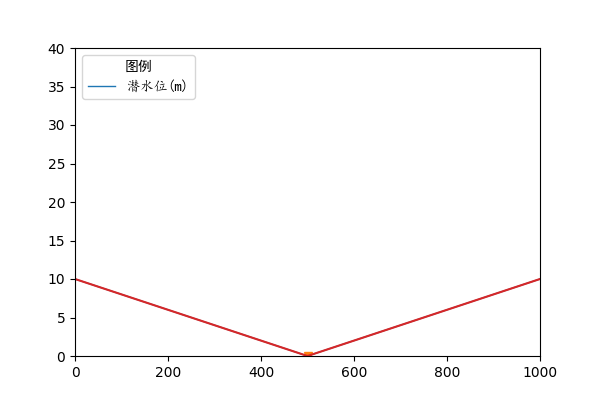

In [16]:
h0_ = np.linspace(10, 30, 101)
hL_ = np.linspace(10, 30, 101)
w0 = np.linspace(-1, 1, 17)
W_ = w0*Wh

x = np.linspace(0, L, 101)

fig, ax = plt.subplots(figsize=[6, 4])

# iplt.plot 绘交互的图形，可变参数用 np.linspace( ) 设定
controls = iplt.plot(x, head, h0=h0_, hL=hL_, W=W_, slider_formats={"W": "{:.4f}"})

## 总结

### 承压水

- $W=0$ 为直线

$$
h_x = \frac{h_L - h_0}{L} x + h_0
$$

- $W>0$ 为开口向下的抛物线
- $W<0$ 为开口向上的抛物线
- $a$ 为分水岭或汇水线

$$
a = \frac{L}{2} + \frac{h_L-h_0}{L} \frac{T}{W}
$$

- **单宽流量**

$$
q_x = W \left(x-\frac{L}{2}\right) - T \frac{h_L-h_0}{L}
$$

### 潜水

- $W=0$ 为左右开口的抛物线

$$
h_x^2 = \frac{h_L^2 - h_0^2}{L} x + h_0^2
$$

- $W>0$ 为椭圆曲线的上半枝
- $W<0$ 为焦点在 $y$ 轴上的双曲线的上半枝；一般水文地质条件下不存在焦点在 $x$ 轴的情况
- $a$ 为分水岭或汇水线

$$
a = \frac{L}{2} + \frac{K}{W} \frac{h_L^2 - h_0^2}{2L}
$$

- **单宽流量**

$$
q_x = W \left(x - \frac{l}{2}\right) - K \frac{h_L^2 - h_0^2}{2L}
$$

>
> - **控制河流水位可改变 $a$ 的位置。**
> - **$a$ 的位置可在河流之间，也可在河流之外。**
>
